<a href="https://colab.research.google.com/github/solar-node/ML/blob/main/InsurancePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [36]:
# Data collection and processing
insurance_dataset=pd.read_csv("/content/drive/MyDrive/ML Projects/insurance.csv")
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
# no. of rows and columns
insurance_dataset.shape

(1338, 7)

In [38]:
# Getting some info. about dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical features:
- Sex/Gender
- Smoker
- Region

Target: Charges

In [39]:
# Checking for missing value
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### Data Analysis

In [40]:
# Statistical measure of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-41-7f391e6995aa>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


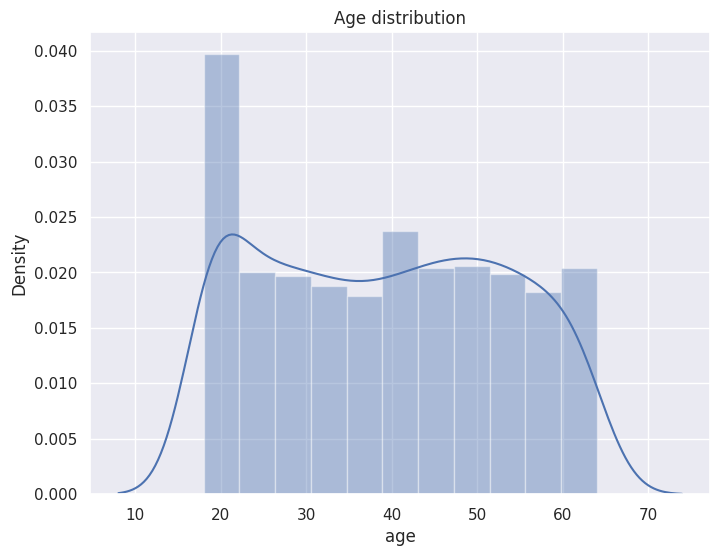

In [41]:
# Distrubution of age value
sns.set()
plt.figure(figsize=(8,6))
sns.distplot(insurance_dataset['age'])

plt.title('Age distribution')
plt.show()

<ipython-input-42-7d328b056b5e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=insurance_dataset,palette="viridis")


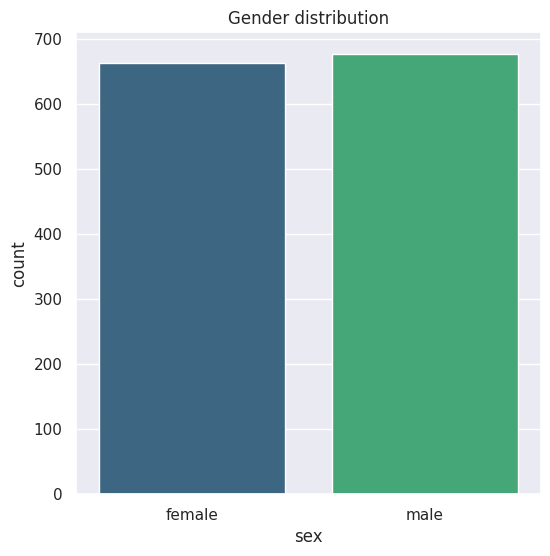

In [42]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance_dataset,palette="viridis")

plt.title('Gender distribution')
plt.show()

In [43]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-44-665acf0a4371>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


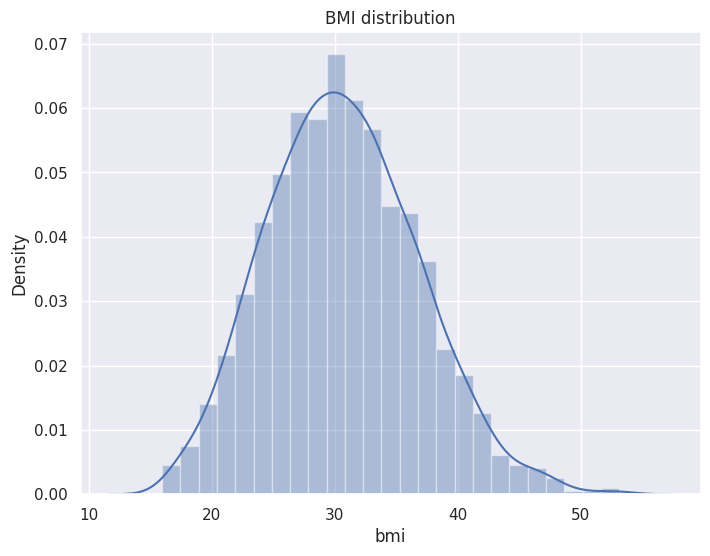

In [44]:
# BMI distribution in dataset
plt.figure(figsize=(8,6))
sns.distplot(insurance_dataset['bmi'])

plt.title('BMI distribution')
plt.show()

Normal BMI range : 18.5 -> 25

<ipython-input-45-51ce948524a7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children',data=insurance_dataset,palette="viridis")


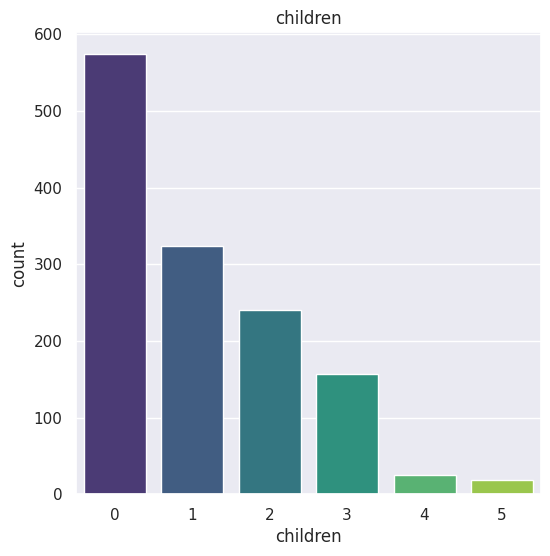

In [45]:
# Children column
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_dataset,palette="viridis")

plt.title('children')
plt.show()

In [46]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


<ipython-input-47-0e5b5e744e28>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker',data=insurance_dataset,palette="viridis")


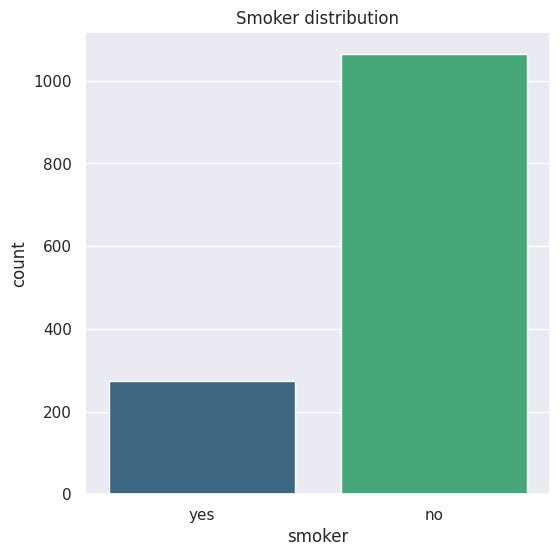

In [47]:
# Smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_dataset,palette="viridis")

plt.title('Smoker distribution')
plt.show()

In [48]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


<ipython-input-49-f281f291b7de>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region',data=insurance_dataset,palette="viridis")


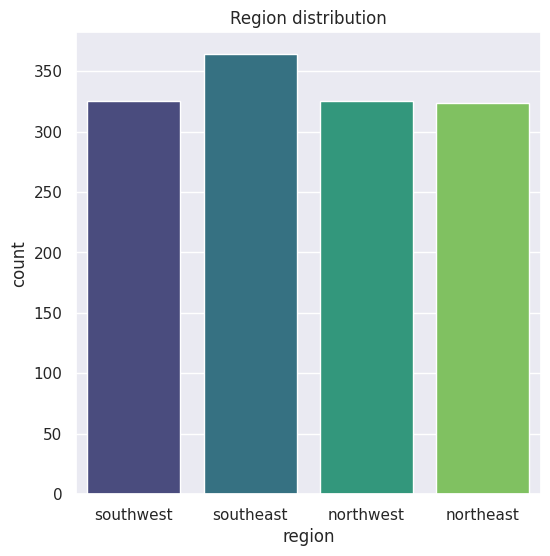

In [49]:
# Region column
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance_dataset,palette="viridis")

plt.title('Region distribution')
plt.show()

In [50]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-51-d65da100fc1f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


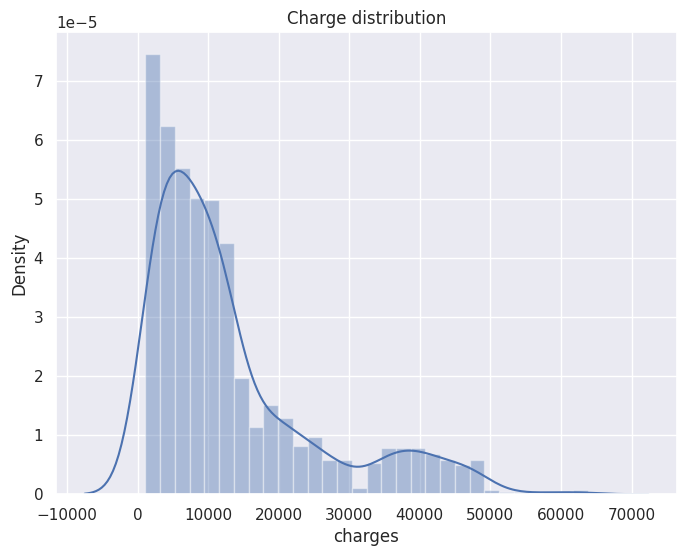

In [51]:
# For age and BMI count plot will not be good because of many values
# USe distribution plot

# Charges distribution
plt.figure(figsize=(8,6))
sns.distplot(insurance_dataset['charges'])

plt.title('Charge distribution')
plt.show()

## Data Pre-processing


### Encoding the categorical features:
-  Computer do not understands the text data like female and male, yes or no
- So we will convert it into numerical value format to make it understable for model.

In [52]:
# Computer do not understands the text data like female and male, yes or no
# So we will convert it into numerical value format to make it understable for model.

# Encoding the gender/sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

# Encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# Encoding region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

insurance_dataset


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


Splitting the features and target




In [53]:
# Splitting the features and target
X=insurance_dataset.drop(columns='charges',axis=1)  #X contains all the other features not target
Y=insurance_dataset['charges']  #Y contains the targert(charges )
print(X)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [54]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into training data and testing data

In [55]:
# Splitting the data into training data and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,  random_state=2)

In [56]:
# Knowing the shape of our train and test data
print(X.shape,X_train.shape, X_test.shape)
print(Y.shape,Y_train.shape, Y_test.shape)

(1338, 6) (1070, 6) (268, 6)
(1338,) (1070,) (268,)


## Model Training


### Linear Regression

In [57]:
# Linear regression model training

# Loading the Linear regression model
regressor= LinearRegression()

In [58]:
# Fitting the training data into regress or to make the line of regression by using the points
regressor.fit(X_train,Y_train)

# Now model has been trained and its time to evaluate/test

LinearRegression()

### Model Evaluation

In [59]:
# Prediction on training data
training_data_prediction = regressor.predict(X_train)


In [60]:
# R squared value : if value is close to 1 then our model is performing well.
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value : ',r2_train)

R Squared value :  0.751505643411174


In [61]:
# Prediction on testing  data
test_data_prediction = regressor.predict(X_test )

In [62]:
# R squared value : if value is close to 1 then our model is performing well.
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared value : ',r2_test)

R Squared value :  0.7447273869684076


## Building a prediction system

In [63]:
# for input
# 'male':0,'female':1
# 'yes':0,'no':1
# 'southeast':0,'southwest':1,'northeast':2,'northwest':3

In [64]:
# Building a system which can predict insurance based on the features in input
input_data=(25,0,26.22,0,1,2)

# changing input_data (tuple) to numpy array
input_data_np=np.asarray(input_data)

input_data_np


array([25.  ,  0.  , 26.22,  0.  ,  1.  ,  2.  ])

In [65]:
# Reshaping the array
input_data_reshaped = input_data_np.reshape(1,-1)
input_data_reshaped

array([[25.  ,  0.  , 26.22,  0.  ,  1.  ,  2.  ]])

In [66]:
# Predicting from the model
prediction = regressor.predict(input_data_reshaped)
print('The insurance cost is : ',prediction[0])

The insurance cost is :  2808.687798001414


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
